In [2]:
import n

C:\Users\User\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x1d2e6ac6e80>)

In [4]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [62]:
flower = ['ромашка_S']

In [72]:
edges = []
flower_1 = []
for word in flower:
    if word in model:
        print(word) 
        print(model[word][:10])
        for i in model.most_similar(positive=[word], topn=10):
            print(i[0], i[1])
            edge = (word, i[0])
            edges.append(edge)
            flower_1.append(word)
            flower_1.append(i[0])
            if i[1] >0.5:
                print(i[1])
                print(model[i[0]][:10])
                for m in model.most_similar(positive=[i[0]], topn=10):
                    print(m[0], m[1])
                    edge_new = (i[0], m[0])
                    edges.append(edge_new)
                    flower_1.append(m[0])
            
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)
        
print(edges)
print(flower_1)

ромашка_S
[ 0.02083518 -0.03445422 -0.07272028 -0.02261832 -0.0413738   0.0080162
  0.01711751  0.03918014  0.00290521 -0.01706054]
цветок_S 0.6362708806991577
0.6362708806991577
[-0.02581728 -0.03161608 -0.08591826 -0.06149414 -0.01005295 -0.02876001
  0.03841765  0.08344615 -0.02903873  0.01043771]
роза_S 0.7362078428268433
хризантема_S 0.6714944839477539
букет_S 0.6640661358833313
маргаритка_S 0.6519109010696411
цветочек_S 0.6496486663818359
фиалка_S 0.6383365988731384
ромашка_S 0.6362708806991577
букетик_S 0.6277430653572083
георгин_S 0.6215323209762573
лепесток_S 0.6212639808654785
роза_S 0.6028355360031128
0.6028355360031128
[-0.01105841  0.01377222 -0.07011075 -0.07622215 -0.01402765 -0.00607022
 -0.02344128  0.10571317  0.02021863 -0.07131413]
цветок_S 0.736207902431488
хризантема_S 0.7018312215805054
пион_S 0.6467634439468384
лилия_S 0.629615068435669
ромашка_S 0.6028355360031128
тюльпан_S 0.5929808616638184
георгин_S 0.5860720276832581
флокс_S 0.5740082859992981
маргаритка_S 

In [73]:
import networkx as nx

In [75]:
G = nx.Graph()
G.add_nodes_from(flower_1)
G.add_edges_from(edges)

In [76]:
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы ['ромашка_S', 'цветок_S', 'роза_S', 'хризантема_S', 'букет_S', 'маргаритка_S', 'цветочек_S', 'фиалка_S', 'букетик_S', 'георгин_S', 'лепесток_S', 'пион_S', 'лилия_S', 'тюльпан_S', 'флокс_S', 'гиацинт_S', 'вьюнок_S', 'душица_S', 'тысячелистник_S', 'шалфей_S', 'донник_S', 'мята_S', 'чабрец_S', 'перечный_A', 'настой_S', 'тимьян_S', 'чебрец_S', 'розмарин_S', 'полынь_S', 'сурепка_S', 'душистый_A', 'клевер_S', 'одуванчик_S', 'подорожник_S', 'репейник_S', 'мать-и-мачеха_S', 'чубушник_S', 'примула_S', 'котовник_S', 'ландыш_S', 'подснежник_S', 'магнолия_S', 'мимоза_S', 'черемуха_S', 'незабудка_S', 'жасмин_S', 'левкой_S', 'резеда_S', 'ирис_S', 'лилейник_S', 'бегония_S', 'астильб_S', 'рудбекия_S', 'гелиотроп_S']
рёбра [('ромашка_S', 'цветок_S'), ('ромашка_S', 'роза_S'), ('ромашка_S', 'маргаритка_S'), ('ромашка_S', 'душица_S'), ('ромашка_S', 'донник_S'), ('ромашка_S', 'одуванчик_S'), ('ромашка_S', 'тысячелистник_S'), ('ромашка_S', 'ландыш_S'), ('ромашка_S', 'фиалка_S'), ('ромашка_S', 'флокс_S'

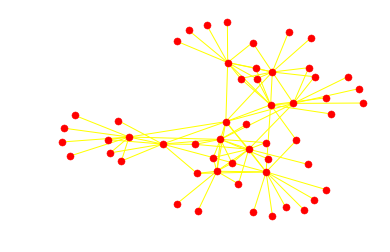

In [77]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

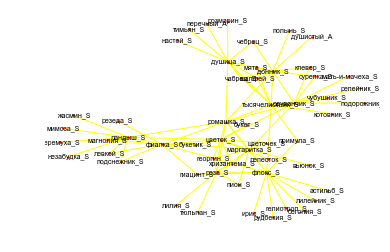

In [79]:
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=3) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=7, font_family='Arial')
plt.axis('off') 
plt.show()

In [80]:
#degree centrality
deg_flower = nx.degree_centrality(G)
i = 0
for nodeid in sorted(deg_flower, key=deg_flower.get, reverse=True):
    i += 1
    print(nodeid, round(deg_flower[nodeid], 3))
    if i == 10:
        break

флокс_S 0.245
цветок_S 0.226
донник_S 0.226
маргаритка_S 0.208
душица_S 0.208
тысячелистник_S 0.208
ромашка_S 0.189
роза_S 0.189
фиалка_S 0.189
одуванчик_S 0.189


In [81]:
bc_flower = betweenness_centrality(G)
print(bc_flower)


NameError: name 'betweenness_centrality' is not defined

In [83]:
a = betweenness_centrality_subset(G, G.nodes(), targets, normalized=False, weight=None)

NameError: name 'betweenness_centrality_subset' is not defined